# Logistic Regression Model and Interpretation

In the below cell, we start the process of importing our previously-used dataset, all of the most recent listings on AirBnB as of May 2016 for the entire city of New York.

In [1]:
import pandas as pd
import numpy as np
from __future__ import print_function
listNYC = pd.read_csv('airbnb_listings_NYC.csv') # read in the "listings" csv

In [2]:
#perform a quick check to see what data
listNYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32546 entries, 0 to 32545
Data columns (total 16 columns):
id                                32546 non-null int64
name                              32545 non-null object
host_id                           32546 non-null int64
host_name                         32541 non-null object
neighbourhood_group               32546 non-null object
neighbourhood                     32546 non-null object
latitude                          32546 non-null float64
longitude                         32546 non-null float64
room_type                         32546 non-null object
price                             32546 non-null int64
minimum_nights                    32546 non-null int64
number_of_reviews                 32546 non-null int64
last_review                       25076 non-null object
reviews_per_month                 25076 non-null float64
calculated_host_listings_count    32546 non-null int64
availability_365                  32546 non-null int64

In [3]:
#Remove any attributes that we will not be using for logisitic regression
del listNYC['id']
del listNYC['host_name']
del listNYC['host_id']
del listNYC['name']
del listNYC['latitude']
del listNYC['longitude']
del listNYC['last_review']

In [4]:
listNYC.info() #perform another quick check to make sure the items we wished to delete were removed from the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32546 entries, 0 to 32545
Data columns (total 9 columns):
neighbourhood_group               32546 non-null object
neighbourhood                     32546 non-null object
room_type                         32546 non-null object
price                             32546 non-null int64
minimum_nights                    32546 non-null int64
number_of_reviews                 32546 non-null int64
reviews_per_month                 25076 non-null float64
calculated_host_listings_count    32546 non-null int64
availability_365                  32546 non-null int64
dtypes: float64(1), int64(5), object(3)
memory usage: 2.2+ MB


In [5]:
#delete one more feature, as this feature is reliant on number of reviews, which we are already using
del listNYC['reviews_per_month'] 

In [6]:
#Rearrange the columns
listNYC = listNYC[['neighbourhood_group','neighbourhood','room_type','availability_365',
                                       'minimum_nights','number_of_reviews',
                                       'calculated_host_listings_count','price']]

In [7]:
listNYC.info() #double-check that the re-arranging worked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32546 entries, 0 to 32545
Data columns (total 8 columns):
neighbourhood_group               32546 non-null object
neighbourhood                     32546 non-null object
room_type                         32546 non-null object
availability_365                  32546 non-null int64
minimum_nights                    32546 non-null int64
number_of_reviews                 32546 non-null int64
calculated_host_listings_count    32546 non-null int64
price                             32546 non-null int64
dtypes: int64(5), object(3)
memory usage: 2.0+ MB


In [8]:
#quickly check which variables that are still in the dataset are considered continuous or ordinal attributes
listNYC.describe()

,availability_365,minimum_nights,number_of_reviews,calculated_host_listings_count,price
count,32546.000000,32546.000000,32546.000000,32546.000000,32546.00000
mean,166.589350,3.299576,13.827045,1.827844,146.97840
std,144.293823,11.483841,25.063762,2.820226,134.84786
min,0.000000,1.000000,0.000000,1.000000,10.00000
25%,4.000000,1.000000,1.000000,1.000000,75.00000
50%,150.000000,2.000000,4.000000,1.000000,115.00000
75%,319.000000,3.000000,15.000000,2.000000,179.00000
max,365.000000,1250.000000,314.000000,39.000000,2000.00000


In [9]:
listNYC[['neighbourhood_group','neighbourhood', 'room_type']].describe().transpose()

,count,unique,top,freq
neighbourhood_group,32546,5,Manhattan,16585
neighbourhood,32546,210,Williamsburg,2574
room_type,32546,3,Entire home/apt,17051


In [10]:
# perform one-hot encoding of the categorical data "neighbourhood group"
tmp_listNYC = pd.get_dummies(listNYC.neighbourhood_group,prefix='neighbourhood_group')

listNYC_imputed = pd.concat((listNYC,tmp_listNYC),axis=1) # add back into the dataframe

In [11]:
listNYC_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32546 entries, 0 to 32545
Data columns (total 13 columns):
neighbourhood_group                  32546 non-null object
neighbourhood                        32546 non-null object
room_type                            32546 non-null object
availability_365                     32546 non-null int64
minimum_nights                       32546 non-null int64
number_of_reviews                    32546 non-null int64
calculated_host_listings_count       32546 non-null int64
price                                32546 non-null int64
neighbourhood_group_Bronx            32546 non-null float64
neighbourhood_group_Brooklyn         32546 non-null float64
neighbourhood_group_Manhattan        32546 non-null float64
neighbourhood_group_Queens           32546 non-null float64
neighbourhood_group_Staten Island    32546 non-null float64
dtypes: float64(5), int64(5), object(3)
memory usage: 3.2+ MB


As you can see in the above output, we have included five additional columns after performing one-hot encoding to the "Neighbourhood Group" category. The following step will remove "neighbourhood group" from the dataset since we will be using the encoding for the logistic regression and testing.

In [12]:
if 'neighbourhood_group' in listNYC_imputed:
    del listNYC_imputed['neighbourhood_group'] # if 'burrough' column still exists, delete it

del listNYC_imputed['neighbourhood']

In [13]:
listNYC_imputed.info() #check to confirm that "neighbourhood_group" was removed as well as neighbourhood

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32546 entries, 0 to 32545
Data columns (total 11 columns):
room_type                            32546 non-null object
availability_365                     32546 non-null int64
minimum_nights                       32546 non-null int64
number_of_reviews                    32546 non-null int64
calculated_host_listings_count       32546 non-null int64
price                                32546 non-null int64
neighbourhood_group_Bronx            32546 non-null float64
neighbourhood_group_Brooklyn         32546 non-null float64
neighbourhood_group_Manhattan        32546 non-null float64
neighbourhood_group_Queens           32546 non-null float64
neighbourhood_group_Staten Island    32546 non-null float64
dtypes: float64(5), int64(5), object(1)
memory usage: 2.7+ MB


Since our dataset is now formatted in the way that best suits our model, one final component that is essential for logistic regression is to classify or predict on a binary value. For this model and assignment, we are attempting to predict if the room type for the listing is either an entire house or apartment or if it is a shared/private room. The code below performs that binary classification and converts them into a 1 or 0, followed by the regression testing and training section.

In [15]:
listNYC_imputed.room_type = listNYC_imputed.room_type.replace(to_replace={'Entire home/apt':1, 'Private room':0, 'Shared room':0})

Now that our dataset has been cleaned up and our features finalized, we can begin the process of performing our logistic regression. For this exercise, we are attempting to see how well the model can predict what type of room that is in the listing based on the contiuous or one-hot encoded variables available in the table. 

The first step (which is below) is to identify our y variable that we are trying to predict. Next, we need to remove that column from our list of attributes in the "x" table. Once we have separated those values, we can determine the number of iterations we wish to run, followed by determining the test size for our analysis.

In [19]:
from sklearn.cross_validation import ShuffleSplit

if 'room_type' in listNYC_imputed:
    y = listNYC_imputed['room_type'].values # get the labels we want
    del listNYC_imputed['room_type'] # get rid of the class label
    x = listNYC_imputed.values # use everything else to predict!
    
num_cv_iterations = 5
num_instances = len(y)
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(32546, n_iter=5, test_size=0.2, random_state=None)


In [20]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object: 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    x_train = x[train_indices]
    y_train = y[train_indices]
    
    x_test = x[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(x_train,y_train)  # train object
    y_hat = lr_clf.predict(x_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

====Iteration 0  ====
accuracy 0.847158218126
confusion matrix
 [[2698  391]
 [ 604 2817]]
====Iteration 1  ====
accuracy 0.849769585253
confusion matrix
 [[2755  365]
 [ 613 2777]]
====Iteration 2  ====
accuracy 0.845314900154
confusion matrix
 [[2686  376]
 [ 631 2817]]
====Iteration 3  ====
accuracy 0.84777265745
confusion matrix
 [[2675  417]
 [ 574 2844]]
====Iteration 4  ====
accuracy 0.842703533026
confusion matrix
 [[2686  414]
 [ 610 2800]]


After five iterations of cross-validation and testing, we see that our model on average has an accuracy of approximately 84-85%, which is a moderately strong model.

In [21]:
# this does the exact same thing as the above block of code, but with shorter syntax

for iter_num, (train_indices, test_indices) in enumerate(cv_object):
    lr_clf.fit(x[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(x[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))

====Iteration 0  ====
accuracy 0.84777265745
confusion matrix
 [[2668  416]
 [ 575 2851]]
====Iteration 1  ====
accuracy 0.841628264209
confusion matrix
 [[2706  433]
 [ 598 2773]]
====Iteration 2  ====
accuracy 0.852073732719
confusion matrix
 [[2745  432]
 [ 531 2802]]
====Iteration 3  ====
accuracy 0.839784946237
confusion matrix
 [[2652  395]
 [ 648 2815]]
====Iteration 4  ====
accuracy 0.838709677419
confusion matrix
 [[2660  430]
 [ 620 2800]]


In [23]:
# and here is an even shorter way of getting the accuracies for each training and test set
from sklearn.cross_validation import cross_val_score
accuracies = cross_val_score(lr_clf, x, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[ 0.84285714  0.83932412  0.84669739  0.84976959  0.84454685]


In [24]:
# here we can change some of the parameters interactively
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None) # get object
    accuracies = cross_val_score(lr_clf,x,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05))

[ 0.84915515  0.84101382  0.84669739  0.84178187  0.85192012]


# Interpreting Weights for the Logistic Regression Model

Below, we begin the process of interpreting the weights for our last trained model for logistic regression, where we are looking to predict the likelihood of a listing being for a whole apartment/house or a shared/private room.

In [34]:
#iterate over the coefficients to calculate weights
weights = lr_clf.coef_.T # Take transpose of column vector
attribute_names = listNYC_imputed.columns
for coef, name in zip(weights,attribute_names):
    print(name, 'has weight of', coef[0])

availability_365 has weight of -0.00305004876041
minimum_nights has weight of 0.0445302037217
number_of_reviews has weight of 0.00527890676882
calculated_host_listings_count has weight of -0.196102304799
price has weight of 0.0310517395751
neighbourhood_group_Bronx has weight of -0.279396665774
neighbourhood_group_Brooklyn has weight of -0.516597317995
neighbourhood_group_Manhattan has weight of -1.07830316846
neighbourhood_group_Queens has weight of -0.363618475652
neighbourhood_group_Staten Island has weight of -0.0471331773016


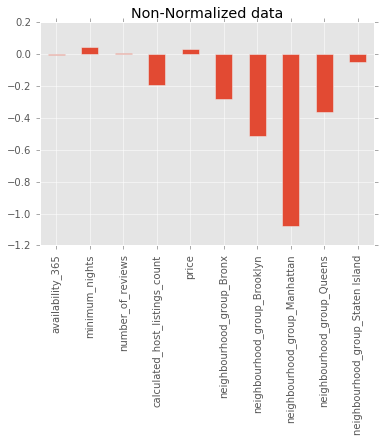

In [27]:
# present weights visually for non-normalized data
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(lr_clf.coef_[0],index=listNYC_imputed.columns)
weights.plot(kind='bar', title='Non-Normalized data')
plt.show()

Usually higher weights interprets as the variable(s) that should be used in logistic regression. From the calculation and visual representation above, it seems like the data is not normalized.

By performing our one-hot encoding followed by creating dummy binary variables for each of the five neighbourhood groups, we can see that the volume of listings by these groups vastly oveshadows other variables which may play a more important role in determining the type of room on the listing. Manhattan is the clear indicator that the weights could be skewing the model, as the vast majority of listings come from this neighbourhood group; therefore, the trained model is likely just looking to see if a listing is in Manhattan in determining the room type, but we know that this is likely not the most accurate representation of our predictive model.

Based on the results above, we do need to normalize the data and calculate the weights again.

In [28]:
from sklearn.preprocessing import StandardScaler

#Scaling attributes by training set
scl_obj = StandardScaler()
scl_obj.fit(x_train)

#Apply to training dataset, and apply means and SD to test dataset
X_train_scaled = scl_obj.transform(x_train)
X_test_scaled = scl_obj.transform(x_test)

#train the model again with scaled data
lr_clf_scaled = LogisticRegression(penalty='l2') # get object
lr_clf_scaled.fit(X_train_scaled,y_train)

#get predicted values for y
y_hat_scaled = lr_clf_scaled.predict(X_test_scaled)

accuracy = mt.accuracy_score(y_test,y_hat_scaled)
confusion_m = mt.confusion_matrix(y_test,y_hat_scaled)

print('accuracy:', accuracy)
print ('confusion matrix:\n', confusion_m)

#sort attributes and split them
zip_values = zip(lr_clf_scaled.coef_.T,listNYC_imputed.columns) # combine attributes
# sort magnitude of the weight in asc order for visualization
#zip_attributes.sort( key = lambda t: np.abs(t[0])) 
for coef, name in zip_values:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.842089093702
confusion matrix:
 [[2685  415]
 [ 613 2797]]
availability_365 has weight of -0.427279117169
minimum_nights has weight of 0.527527892646
number_of_reviews has weight of 0.111201421291
calculated_host_listings_count has weight of -0.530406182886
price has weight of 4.08432193292
neighbourhood_group_Bronx has weight of 0.051397080287
neighbourhood_group_Brooklyn has weight of 0.103296263384
neighbourhood_group_Manhattan has weight of -0.171401439503
neighbourhood_group_Queens has weight of 0.0910188913476
neighbourhood_group_Staten Island has weight of 0.05131276263


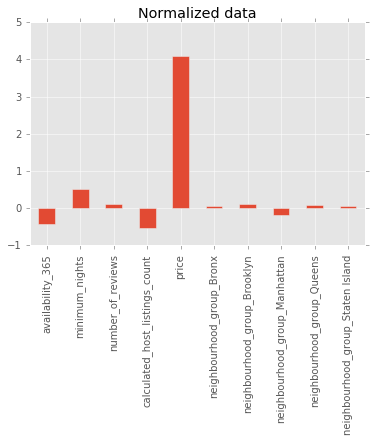

In [29]:
# present weights visually for non-normalized data
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(lr_clf_scaled.coef_[0],index=listNYC_imputed.columns)
weights.plot(kind='bar', title='Normalized data')
plt.show()

Now that the data is normalized and we can observe from the updated chart above for our weights from weights, it is much more evident that price is the leading indicator in determining the room type for the logistic regression model. Even more importantly, the normalizing of the data made the neighbourhood group variables basically non-essential, with no group getting above a 0.17 from a variable weight perspective.

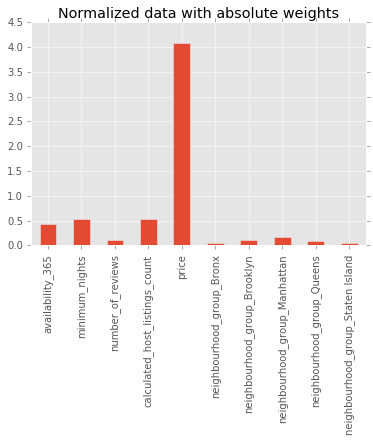

In [30]:
# lets draw a chart with absolute weights to decide on attributes to remove
# present weights visually for non-normalized data
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(abs(lr_clf_scaled.coef_[0]),index=listNYC_imputed.columns)
weights.plot(kind='bar', title='Normalized data with absolute weights')
plt.show()

Before we move on to eliminating attributes from the model, let's evaluate the weights again by utilizing Pipelines in scikit learn.

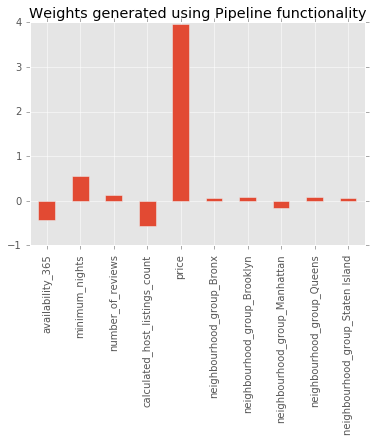

In [31]:
from sklearn.pipeline import Pipeline

std_scl = StandardScaler()
lr_clf_pipelined = LogisticRegression(penalty='l2', C=0.05) 

# create the pipline
pipelined_object = Pipeline([('scale', std_scl), ('logit_model', lr_clf_pipelined)])

# run the pipline corssvalidated
for iter_num, (train_indices, test_indices) in enumerate(cv_object):
    pipelined_object.fit(x[train_indices],y[train_indices])  # train object
    
# it is a little odd getting trained objects from a  pipeline:
pipelined_trained_model = pipelined_object.named_steps['logit_model']

# now look at the weights
weights = pd.Series(pipelined_trained_model.coef_[0],index=listNYC_imputed.columns)
weights.plot(kind='bar', title='Weights generated using Pipeline functionality')
plt.show()

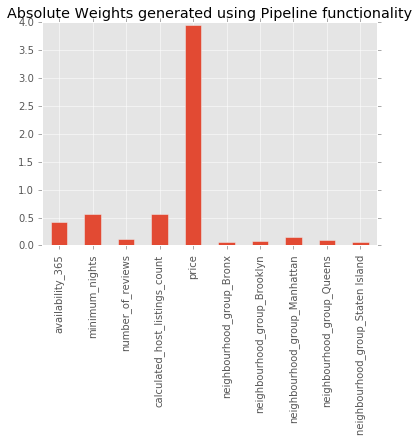

In [32]:
weights = pd.Series(abs(pipelined_trained_model.coef_[0]),index=listNYC_imputed.columns)
weights.plot(kind='bar', title='Absolute Weights generated using Pipeline functionality')
plt.show()

After analyzing weights generated through the Pipeline method and weights generated using scaled(normalized) data, we can decide that price, availability_365, minumum_nights, calculated_host_listings_count should be included in the model for logistic regression. 

In reviewing the charts above to see which attributes we should consider in the final model (price, availability, minimum number of nights and the amount of listings a host currently has), it is important to try and understand why these variables seem to matter the most in determining the room type.

1. Price - This is the most obvious indicator in determining the type of room that is available. Especially in a city such as New York, square footage is the ticket. A listing of a shared or private room means that the host will likely be in the apartment or house with you and you have shared access to a bathroom, kitchen, etc. However, having an entire apartment in New York will definitely cost generally more, no matter which neighbourhood group it belongs to, which is why those attributes play little importance in the final model.

2. Availability - The amount of days a listing is available can influence the pricing. Typically, listings that have a higher availability (possibly even the entire year) will likely have a lower overall cost because the host wants to fill the space as often as possible. Additionally, the availability of a shared or private room may also be higher because a host is typically living there and offering their space on a more frequent basis.

3. Minimum nights - This attribute may have an effect on the room type because based on which type of room is being listed, the minimum amount may differ. Typically, for an entire apartment, most hosts require that you stay a certain amount of days or more, especially if they have multiple listings because they want guests to be committed to their reservation, whereas a shared or private room may be slightly more leniant.

4. Count of host listings - In the case with this attribute, if a host has multiple listings it is more likely this is their primary source of income and they may be slightly more competituve in terms of their listing price and room type. Additionally, if a host has multiple listings, then they are likely the tenant of the entire apartment, thereby helping to determine the type of room.

# Analysis with SVM

Below, we being the process of creating a predictive model using Support Vector Machine methods. The intent of performing an SVM analysis will allow us to compare to see which models (SVM or Logistic Regression) can be considered more accurate for determining if a room type is either the entire apartment/house or a shared/private room.

In [35]:
#create new variables for x and y scaled data

for train_indices, test_indices in cv_object: 
   
    x_train_svm = x[train_indices]
    y_train_svm = y[train_indices]
    
    x_test_svm = x[test_indices]
    y_test_svm = y[test_indices]
    
X_train_scaled_svm = scl_obj.transform(x_train_svm) # apply to training
X_test_scaled_svm = scl_obj.transform(x_test_svm) 

In [36]:
from sklearn.svm import SVC

# train the model again using SVC
svm_clf = SVC(C=1.0, kernel='linear', degree=3, gamma='auto') 
svm_clf.fit(X_train_scaled_svm, y_train_svm)  

y_hat_svm = svm_clf.predict(X_test_scaled_svm) # get test set precitions using svm

accuracy_svm = mt.accuracy_score(y_test_svm,y_hat_svm)
confusion_svm = mt.confusion_matrix(y_test_svm,y_hat_svm)
print('accuracy with SVM:', accuracy_svm )
print('confusion matrix:\n',confusion_svm)

accuracy with SVM: 0.857450076805
confusion matrix:
 [[2677  396]
 [ 532 2905]]


As you can see above based on the level of accuracy and its respective confusion matrix, the SVM model does not really perform much better when compared to the logistic regression model. Through 5 iterations of the logistic regression model, the accuracy was an average of 0.84, while the accuracy of the SVM is 0.857; therefore, the SVM did perform slightly better than the logistic model.

In [37]:
#evaluate support vectors 
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(11350, 10)
(11350,)
[5675 5675]


[[-0.31183849  0.44753628  0.05777422 -0.43629833  3.5294666   0.05494675
   0.08039849 -0.15639847  0.10282146  0.05026908]]


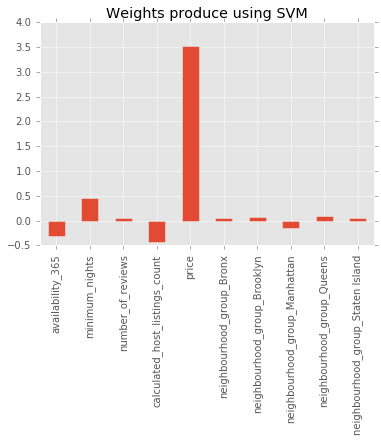

In [38]:
# get weights and generate graph
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=listNYC_imputed.columns)
weights.plot(kind='bar', title='Weights produce using SVM')

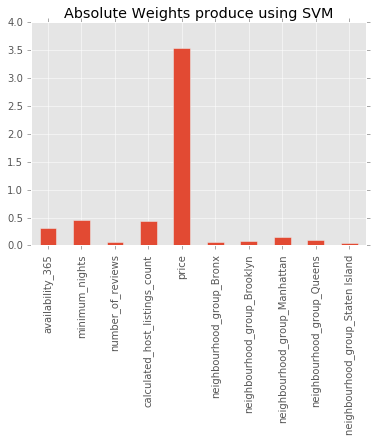

In [39]:
# get absolute value of weights
weights = pd.Series(abs(svm_clf.coef_[0]),index=listNYC_imputed.columns)
weights.plot(kind='bar', title='Absolute Weights produce using SVM')

The possible reason as to why the SVM model is slightly better than the logistic model may have to do with the weights of the attributes used. The values for each of the four primary attributes are all slightly lower than with the logistic values, showing that the combination of the parameters do not have as much of a weighting effect on the model in terms of predicting room type. 

In [40]:
#analyze with SVM and check different instances
listNYC_tested_on = listNYC_imputed.loc[train_indices] 

# get the support vectors from the trained model
listNYC_support = listNYC_tested_on.loc[svm_clf.support_,:]
#add room_type
listNYC_support['room_type'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
listNYC_imputed['room_type'] = y
listNYC_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 4 to 26035
Data columns (total 11 columns):
availability_365                     9092 non-null float64
minimum_nights                       9092 non-null float64
number_of_reviews                    9092 non-null float64
calculated_host_listings_count       9092 non-null float64
price                                9092 non-null float64
neighbourhood_group_Bronx            9092 non-null float64
neighbourhood_group_Brooklyn         9092 non-null float64
neighbourhood_group_Manhattan        9092 non-null float64
neighbourhood_group_Queens           9092 non-null float64
neighbourhood_group_Staten Island    9092 non-null float64
room_type                            11350 non-null int64
dtypes: float64(10), int64(1)
memory usage: 1.0 MB


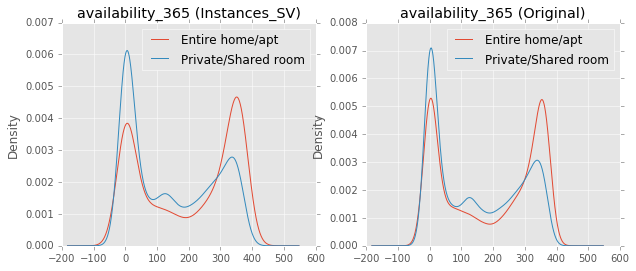

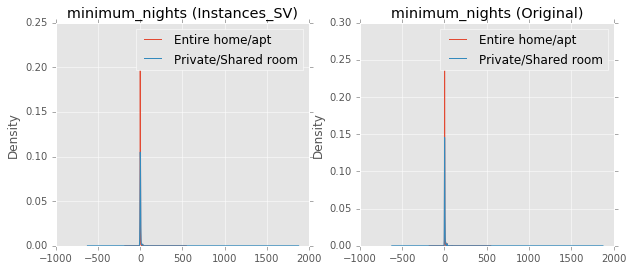

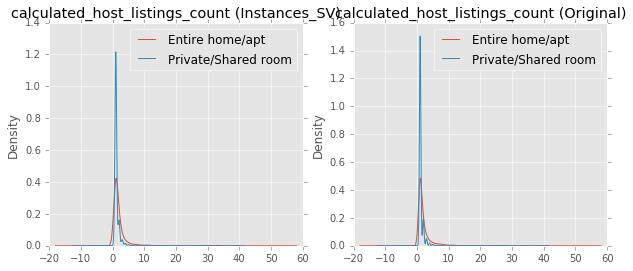

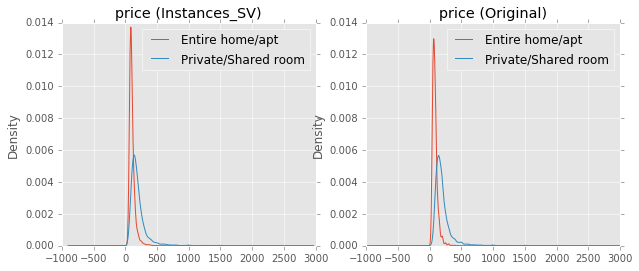

In [41]:
# now lets see the statistics of these attributes
from pandas.tools.plotting import boxplot

# group the original data and the support vectors
listNYC_grouped_support = listNYC_support.groupby(['room_type'])
listNYC_grouped = listNYC_imputed.groupby(['room_type'])

# plot graph for Different variables as compare to room_type
#vars_to_plot = ['availability_365','minimum_nights','number_of_reviews'
#                ,'calculated_host_listings_count','price','neighbourhood_group_Bronx'
#               ,'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan'
#               , 'neighbourhood_group_Staten Island']
vars_to_plot = ['availability_365','minimum_nights'
                ,'calculated_host_listings_count','price']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = listNYC_grouped_support[v].plot.kde() 
    plt.legend(['Entire home/apt', 'Private/Shared room'])
    plt.title(v+' (Instances_SV)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = listNYC_grouped[v].plot.kde() 
    plt.legend(['Entire home/apt', 'Private/Shared room'])
    plt.title(v+' (Original)')

Finally, we need to observe the kernel density for each of the models and for the chosen attributes we wish to use in the final model. Below is a brief description of each attribute and how their density distribution compares between the SVM and Logistic Regression models.
1. Availability - It is very noticeable within this attribute that two of the most common values for availability are either 0 (which matches with the minimum nights insights below) or 365 (so it is essentially available all year-round). There is a fairly even distribution of availability however between 0 and 365.
2. Minimum Nights - The distribution of these instances is somewhat difficult to read, but it definitely tells us a lot about this attribute. Basically the vast majority of listings are not more than a minium night amount of 5; however, there are a few listings that exceed 1000 days. These instances may actually need to removed as they may be considered outliers. It is likely that even though these listings are active, the host currently sets the minimum number of nights too high so no one will attempt to reserve the listing itself.
3. Calculated Host Listings - The extreme majority of hosts who place a listing typically only have 1 listing, while a select few may have sligthly more than that, but basically no more than 10.
4. Price - We can see with the SVM chart that the right tail of the distribution curve is more smooth than the logistic model, but other than that difference both densities are fairly similar.